In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (C:\Users\hp38d\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py)

In [2]:
#Data Collection and Pre-processing
#Loading the data from the CSV file to pandas Data Frame
raw_mail_data=pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
#Replacing the null values with the null string
mail_data=raw_mail_data.where((pd.notnull(raw_mail_data)),'')   #'' represents here an empty string

In [5]:
#Printing the first 5 rows of a data frame
mail_data.head()      # .head() is used to print the 5 rows of a dataframe which is default

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Taking the number of rows input from the user for displaying the rows
rows=int(input("Enter the number of rows you want to display:"))
mail_data.head(rows)

Enter the number of rows you want to display:15


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
#Checking the number of rows and columns present in the dataframe
mail_data.shape              #The output will gives (number of rows, number of columns)

(5572, 2)

In [9]:
#Labelling the spam email as 0 and ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category',]=0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',]=1

In [11]:
#Separating the data as text as labels
#Our input column is Message (X) and target varible is Category(Y)
X=mail_data['Message']
Y=mail_data['Category']
print(X)
#X=mail_data('Message')
#Y=mail_data('Category')
#print(X)---> Gives the run time error


0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [12]:
#Similary showing the Y column 
X=mail_data['Message']
Y=mail_data['Category']
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [16]:
# Splitting the data set into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
#test_size 0.2 means that 20% of the data will go for the testing data and the rest 80% is for the training data set
# Print the number of rows for X, X_train, and X_test
print("Printing the X-attribute")
print("Total number of rows in X:", X.shape[0])
print("Total number of rows in X_train (80% of the data):", X_train.shape[0])
print("Total number of rows in X_test (20% of the data):", X_test.shape[0])

Printing the X-attribute
Total number of rows in X: 5572
Total number of rows in X_train (80% of the data): 4457
Total number of rows in X_test (20% of the data): 1115


In [17]:
#Similarly printing for the Y labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
#test_size 0.2 means that 20% of the data will go for the testing data and the rest 80% is for the training data set
# Print the number of rows for X, X_train, and X_test
print("Printing the X-attribute")
print("Total number of rows in Y:", Y.shape[0])
print("Total number of rows in Y_train (80% of the data):", Y_train.shape[0])
print("Total number of rows in Y_test (20% of the data):", Y_test.shape[0])

Printing the X-attribute
Total number of rows in Y: 5572
Total number of rows in Y_train (80% of the data): 4457
Total number of rows in Y_test (20% of the data): 1115


In [18]:
#Feature Extraction
#Transforming the text data into feature vectors that can be used as the input to the logistic Regression model
feature_extraction=TfidVectorizer(min_df=1, stop_words='english', lowercase='True')
#Stop words--> Words that doesnot have much meaning will be removed
#lowercase--> Text data will be converted into lower case for the better data analysis
X_train_features= feature_extraction.fit_transform(X_train)
X_test_features= feature_extraction.transform(X_test)
#Do not required feature extraction because for Y because it only contains values like 0 and 1

#Converting the data type of Y as int
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


NameError: name 'TfidVectorizer' is not defined

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction
#Transforming the text data into feature vectors that can be used as the input to the logistic Regression model
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
#Stop words--> Words that doesnot have much meaning will be removed
#lowercase--> Text data will be converted into lower case for the better data analysis

# Apply feature extraction to X
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
#Do not required feature extraction because for Y because it only contains values like 0 and 1


# You can remove these lines if Y contains 0s and 1s and doesn't require data type conversion
#Converting the data type of Y as int
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [21]:
print(X_train_features)      # Converts text data into some numeric data

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [22]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#Training the Logistic Regression Model using the training data 
model.fit(X_train_features, Y_train)

LogisticRegression()

In [23]:
from sklearn.linear_model import LogisticRegression

# Logistic regression
model = LogisticRegression()

# Training the Logistic Regression Model using the training data
model.fit(X_train_features, Y_train)


LogisticRegression()

In [24]:
#Prediction on training data
from sklearn.metrics import accuracy_score
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [25]:
print("Accuracy on the tra#Prediction on training data
from sklearn.metrics import accuracy_score
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)ining data",accuracy_on_training_data)

Accuracy on the training data 0.9670181736594121


In [28]:
#Prediction on testing data
from sklearn.metrics import accuracy_score
prediction_on_testing_data=model.predict(X_test_features)
accuracy_on_testing_data=accuracy_score(Y_test,prediction_on_testing_data)
print("Accuracy on the testing data",accuracy_on_testing_data)

Accuracy on the testing data 0.9659192825112107


In [3]:
#

NameError: name 'feature_extraction' is not defined

In [5]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(["Accuracy on Training Data"], [accuracy_on_training_data], color='blue')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Building a predictive model
input_email = ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friend's Callertune"]
input_data_features = feature_extraction.transform(input_email)

# Making predictions
prediction = model.predict(input_data_features)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("Ham Mails")
else:
    print("Spam Mails")

# Testing the model on the test set
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Accuracy on Test Data:", accuracy_on_test_data)

# Plotting the accuracy on test data
plt.figure(figsize=(8, 6))
plt.bar(["Accuracy on Test Data"], [accuracy_on_test_data], color='green')
plt.ylim(0, 1)
plt.title("Model Accuracy on Test Data")
plt.ylabel("Accuracy")
plt.show()

NameError: name 'accuracy_on_training_data' is not defined

<Figure size 800x600 with 0 Axes>

C:\Users\hp38d\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'model' is not defined

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Printing Classification Report
print("Classification Report:\n", class_report)


NameError: name 'model' is not defined

[1]
Ham Mails


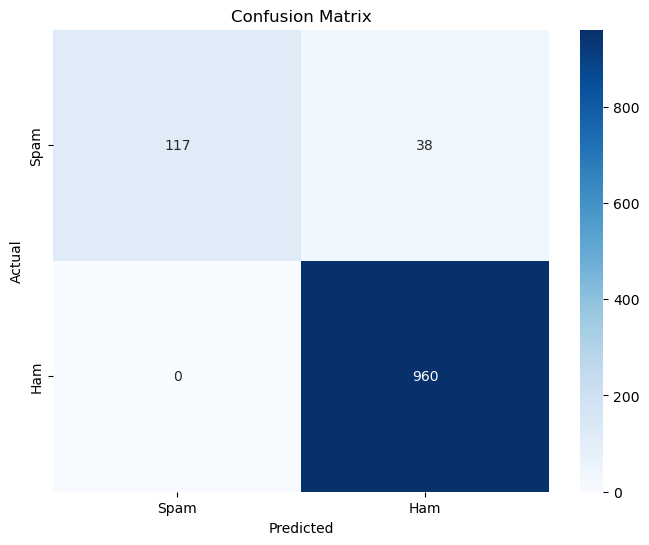

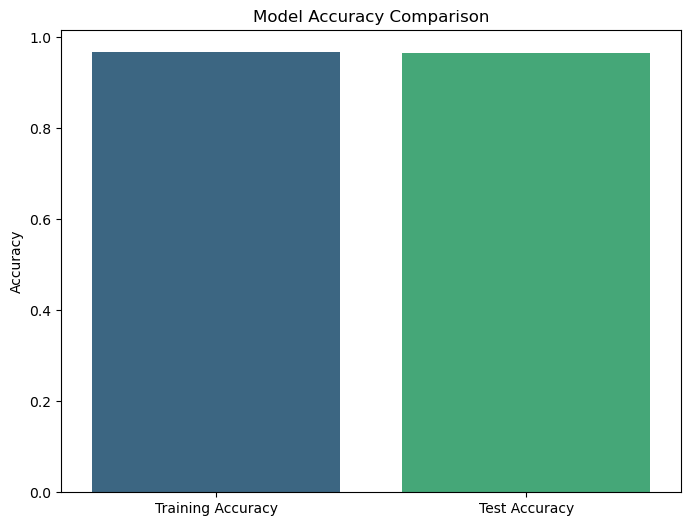

Classification Report:


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
Y_test = Y_test.astype(int)

#Building a predictive model
input_email= ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]
input_data_features=feature_extraction.transform(input_email)
#making predictions
prediction=model.predict(input_data_features)
print(prediction)
if prediction[0]==1:
    print("Ham Mails")
else:
    print("Spam mails")


# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)



# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Printing Classification Report
print("Classification Report:")



NameError: name 'Y_test' is not defined

NameError: name 'mail_data' is not defined

In [17]:
# Assuming you've already defined and trained your model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
Y_test = Y_test.astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Printing Classification Report
print("Classification Report:\n", class_report)


NameError: name 'X_train_features' is not defined

NameError: name 'X_train' is not defined

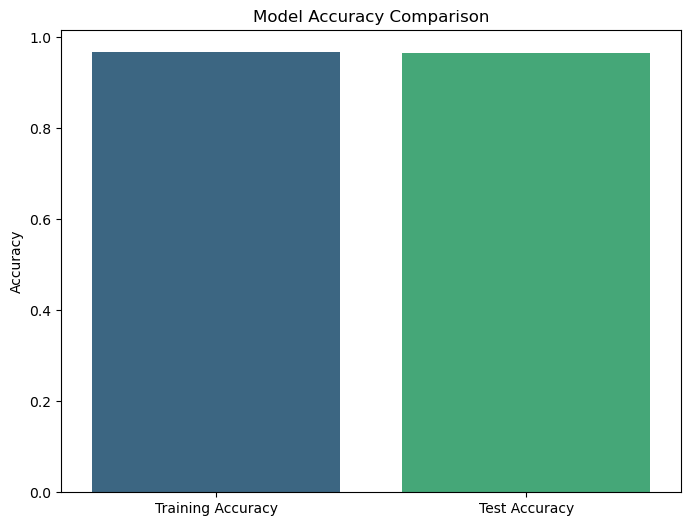

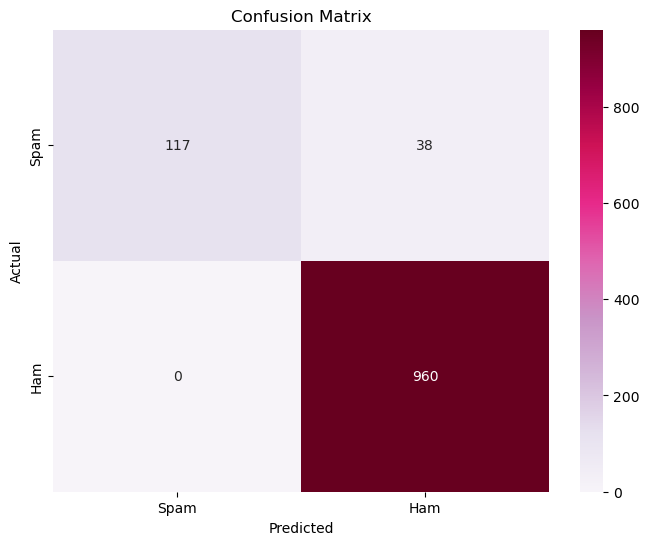

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Assuming you have a 'Category' column in your dataset
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Apply feature extraction to X_train
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Convert Y_test to int for compatibility
Y_test = Y_test.astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)



# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Printing Classification Report
print("Classification Report:\n", class_report)


NameError: name 'accuracy_on_training_data' is not defined

<Figure size 800x600 with 0 Axes>

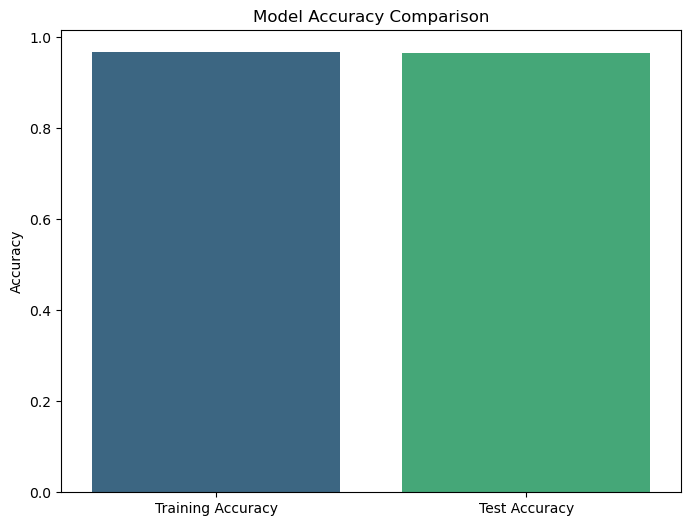

In [22]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)



# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()



[1]
Ham Mails


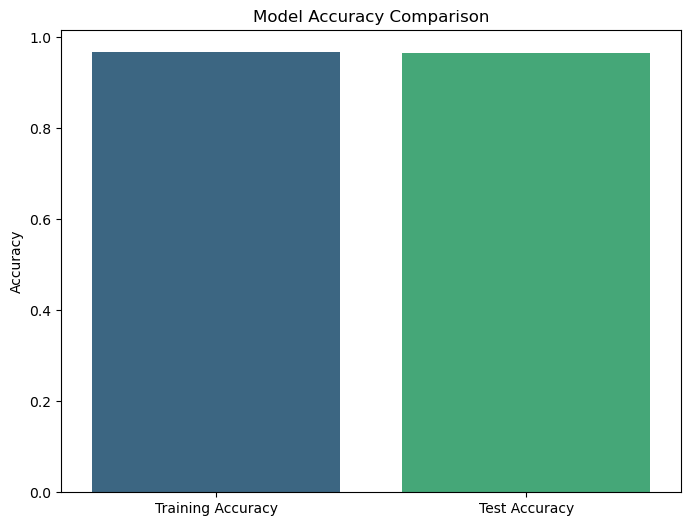

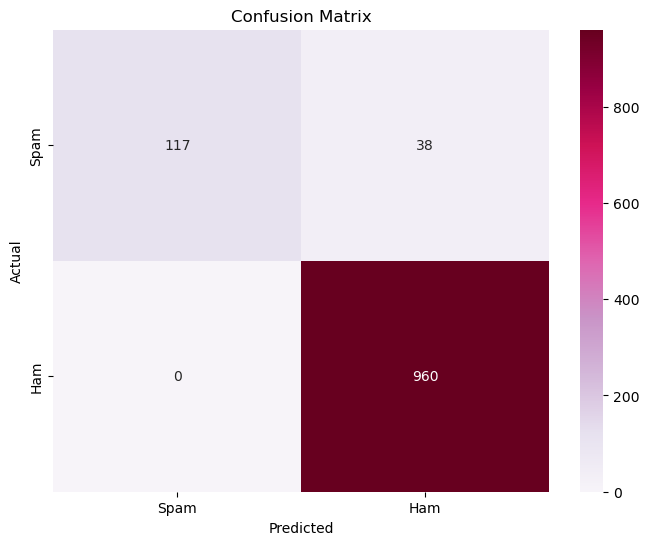

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy on the testing data 0.9659192825112107


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Assuming you have a 'Category' column in your dataset
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Apply feature extraction to X_train
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

#Building a predictive model
input_email= ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]
input_data_features=feature_extraction.transform(input_email)


#making predictions
prediction=model.predict(input_data_features)
print(prediction)
if prediction[0]==1:
    print("Ham Mails")
else:
    print("Spam mails")

# Convert Y_test to int for compatibility
Y_test = Y_test.astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)



# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Printing Classification Report
print("Classification Report:\n", class_report)


#Prediction on testing data
from sklearn.metrics import accuracy_score
prediction_on_testing_data=model.predict(X_test_features)
accuracy_on_testing_data=accuracy_score(Y_test,prediction_on_testing_data)
print("Accuracy on the testing data",accuracy_on_testing_data)


In [1]:
#Building a predictive model
input_email= ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]
input_data_features=feature_extraction.transform(input_email)
#making predictions
prediction=model.predict(input_data_features)
print(prediction)
if prediction[0]==1:
    print("Ham Mails")
else:
    print("Spam mails")
    

NameError: name 'feature_extraction' is not defined

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Pre-processing
# Loading the data from the CSV file to pandas Data Frame
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Replacing the null values with an empty string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Labelling the spam email as 0 and ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

# Separating the data as text and labels
X = mail_data['Message']
Y = mail_data['Category']

# Splitting the data set into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
# Transforming the text data into feature vectors
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Converting the data type of Y as int
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Accuracy on the training data:", accuracy_on_training_data)

# Building a predictive model
input_email = ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friend's Callertune"]
input_data_features = feature_extraction.transform(input_email)

# Making predictions
prediction = model.predict(input_data_features)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("Ham Mails")
else:
    print("Spam Mails")

# Testing the model on the test set
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Accuracy on Test Data:", accuracy_on_test_data)


C:\Users\hp38d\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Accuracy on the training data: 0.9670181736594121
Prediction: [1]
Ham Mails
Accuracy on Test Data: 0.9659192825112107


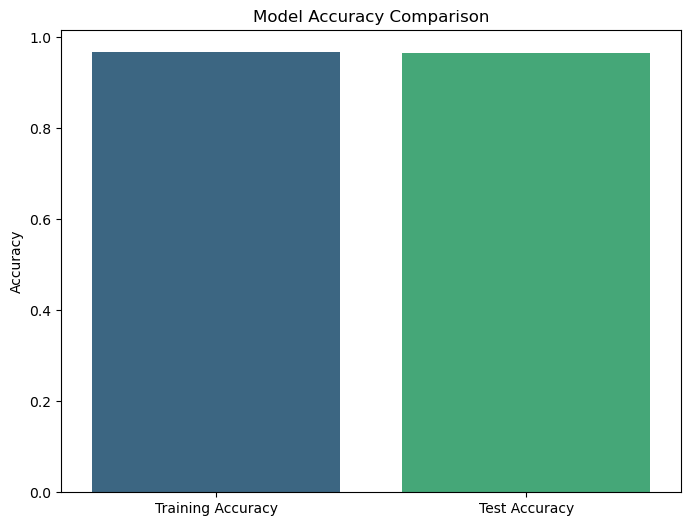

NameError: name 'conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Assuming you have a 'Category' column in your dataset
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Apply feature extraction to X_train
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)



# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Printing Classification Report
print("Classification Report:\n", class_report)

In [3]:

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


NameError: name 'conf_matrix' is not defined

<Figure size 800x600 with 0 Axes>

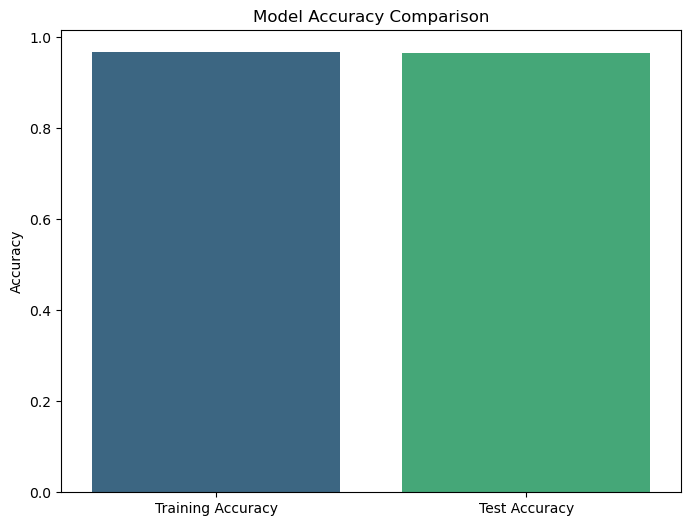

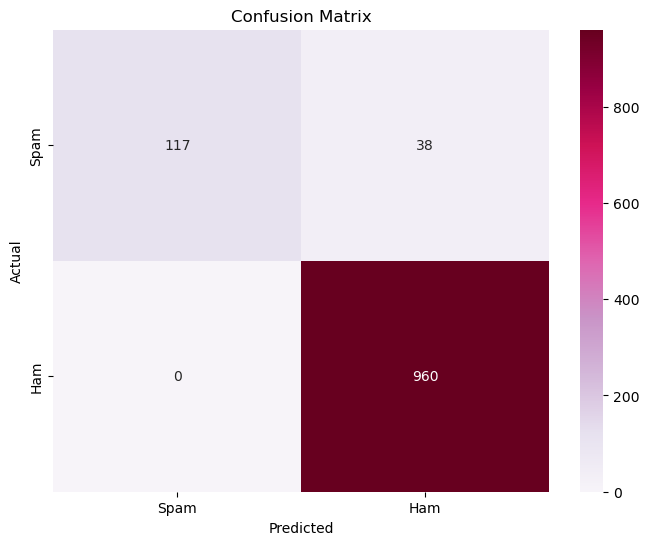

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Assuming you have a 'Category' column in your dataset
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Apply feature extraction to X_train
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Printing Classification Report
print("Classification Report:\n", class_report)


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Pre-processing
# Loading the data from the CSV file to pandas Data Frame
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Replacing the null values with an empty string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

# Labelling the spam email as 0 and ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category'] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category'] = 1

# Separating the data as text and labels
X = mail_data['Message']
Y = mail_data['Category']

# Splitting the data set into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
# Transforming the text data into feature vectors
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Converting the data type of Y as int
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print("Accuracy on the training data:", accuracy_on_training_data)

# Building a predictive model
input_email = ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friend's Callertune"]
input_data_features = feature_extraction.transform(input_email)

# Making predictions
prediction = model.predict(input_data_features)
print("Prediction:", prediction)

if prediction[0] == 1:
    print("Ham Mails")
else:
    print("Spam Mails")

# Testing the model on the test set
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print("Accuracy on Test Data:", accuracy_on_test_data)

Accuracy on the training data: 0.9670181736594121
Prediction: [1]
Ham Mails
Accuracy on Test Data: 0.9659192825112107


Cannot plot decision boundary for more than two features.


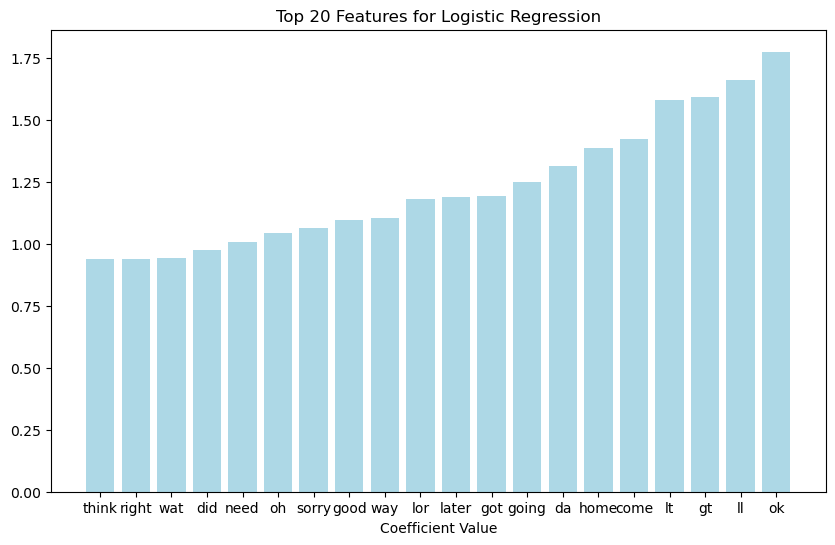

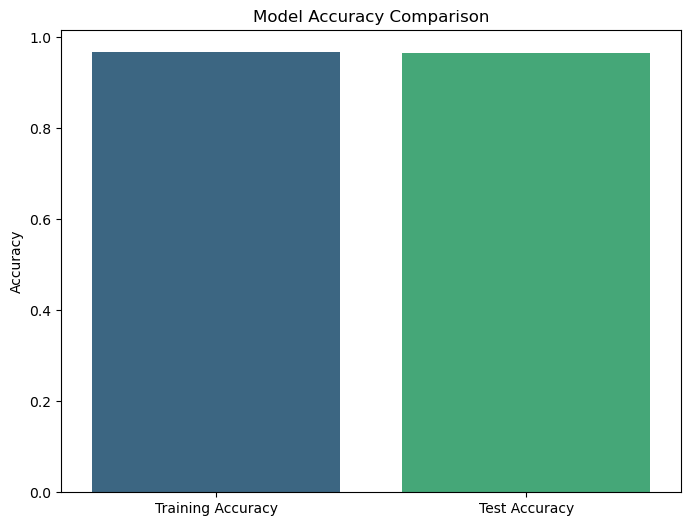

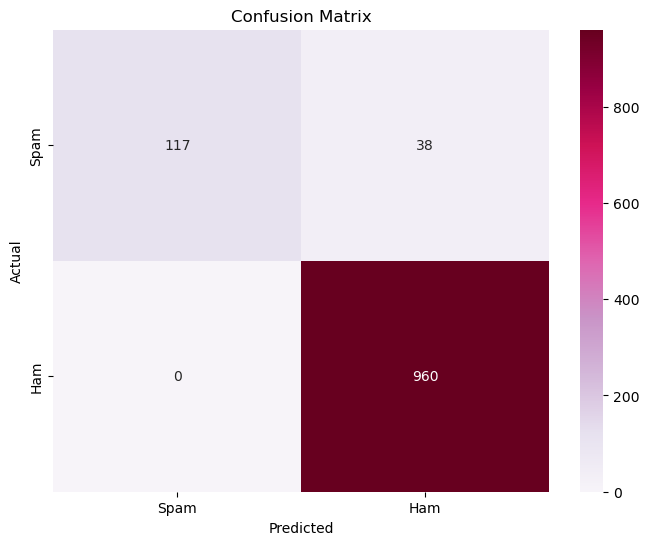

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86       155
           1       0.96      1.00      0.98       960

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data['Message']
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Plotting the decision boundary
if X_train_features.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train_features[:, 0].min() - 1, X_train_features[:, 0].max() + 1
    y_min, y_max = X_train_features[:, 1].min() - 1, X_train_features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Scatter plot of training points
    plt.scatter(X_train_features[:, 0], X_train_features[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("Cannot plot decision boundary for more than two features.")


# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

# Plotting Logistic Regression Curve
coefficients = model.coef_.flatten()
feature_names = np.array(feature_extraction.get_feature_names_out())
sorted_indices = np.argsort(coefficients)

plt.figure(figsize=(10, 6))
plt.bar(feature_names[sorted_indices[-20:]], coefficients[sorted_indices[-20:]], color='lightblue')
plt.title('Top 20 Features for Logistic Regression')
plt.xlabel('Coefficient Value')
plt.show()

# Plotting Accuracy Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Training Accuracy', 'Test Accuracy'], y=[accuracy_on_training_data, accuracy_on_test_data], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(Y_test, prediction_on_test_data)

# Printing Classification Report
print("Classification Report:\n", class_report)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

X = mail_data[['Feature1', 'Feature2']]  # Replace 'Feature1' and 'Feature2' with your actual feature names
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Plotting the decision boundary
# Assuming only 2 features for simplicity, adapt if you have more features
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(feature_extraction.transform(np.c_[xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Scatter plot of training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("Cannot plot decision boundary for more than two features.")


KeyError: "None of [Index(['Feature1', 'Feature2'], dtype='object')] are in the [columns]"

In [7]:
# ...

# Plotting the decision boundary
# Assuming only 2 features for simplicity, adapt if you have more features
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(feature_extraction.transform(np.c_[xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Scatter plot of training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("Cannot plot decision boundary for more than two features.")


IndexError: tuple index out of range

In [8]:
# ...

# Plotting the decision boundary
# Assuming only 2 features for simplicity, adapt if you have more features
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(feature_extraction.transform(np.c_[xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Scatter plot of training points
    plt.scatter(X_train.iloc[:, 0].values, X_train.iloc[:, 1].values, c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("Cannot plot decision boundary for more than two features.")


IndexError: tuple index out of range

In [9]:
# ...

# Plotting the decision boundary
# Assuming only 2 features for simplicity, adapt if you have more features
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(feature_extraction.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    
    # Contour plot for decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Scatter plot of training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("Cannot plot decision boundary for more than two features.")

    

IndexError: tuple index out of range

In [10]:
# ...

# Plotting the decision boundary
# Assuming only 2 features for simplicity, adapt if you have more features
if X_train.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    
    # Contour plot for decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    
    # Scatter plot of training points
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
else:
    print("Cannot plot decision boundary for more than two features.")


IndexError: tuple index out of range

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Load your data
raw_mail_data = pd.read_csv(r'C:\Users\hp38d\Desktop\Email Spam Detection using Machine learning\mail_data.csv')

# Data Pre-processing
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})

# Assuming 'Feature1' and 'Feature2' are your features, replace them with actual column names
X = mail_data[['Feature1', 'Feature2']]
Y = mail_data['Category']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the training set
prediction_on_training_data = model.predict(X_train)
# Convert predictions to binary values (0 or 1)
prediction_on_training_data_binary = np.round(prediction_on_training_data)

# Predict on the test set
prediction_on_test_data = model.predict(X_test)
# Convert predictions to binary values (0 or 1)
prediction_on_test_data_binary = np.round(prediction_on_test_data)

# Calculate accuracy
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data_binary)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data_binary)

print("Accuracy on the training data:", accuracy_on_training_data)
print("Accuracy on the test data:", accuracy_on_test_data)


KeyError: "None of [Index(['Feature1', 'Feature2'], dtype='object')] are in the [columns]"

In [12]:
from sklearn.metrics import mean_squared_error

# Assuming prediction_on_test_data and Y_test are your predicted and actual values
mse = mean_squared_error(Y_test, prediction_on_test_data)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.034080717488789235


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming prediction_on_test_data and Y_test are your predicted and actual values
threshold = 0.5

# Convert predictions to binary values (0 or 1) based on the threshold
binary_predictions = np.where(prediction_on_test_data >= threshold, 1, 0)

# Calculate accuracy using the binary predictions
classification_accuracy = accuracy_score(Y_test, binary_predictions)
print("Classification Accuracy:", classification_accuracy)


Classification Accuracy: 0.9659192825112107


In [14]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    return accuracy_on_test_data

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        self.data_path_label = tk.Label(master, text="Select CSV file:")
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection)
        self.run_button.pack()

        self.result_label = tk.Label(master, text="")
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            result = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Accuracy on Test Data: {result:.2%}")
        else:
            self.result_label.config(text="Please select a CSV file first.")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


In [15]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    return accuracy_on_test_data

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            result = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Accuracy on Test Data: {result:.2%}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


In [18]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    return accuracy_on_test_data

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("600x400")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            result = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Accuracy on Test Data: {result:.2%}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


In [19]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    return accuracy_on_test_data, confusion_matrix(Y_test, prediction_on_test_data)

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("600x400")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

        # Buttons for additional functionality
        self.accuracy_button = tk.Button(master, text="Calculate Accuracy", command=self.calculate_accuracy, bg="#ff9800", fg="white", font=self.font_style)
        self.accuracy_button.pack()

        self.precision_button = tk.Button(master, text="Calculate Precision", command=self.calculate_precision, bg="#795548", fg="white", font=self.font_style)
        self.precision_button.pack()

        self.error_button = tk.Button(master, text="Calculate Error", command=self.calculate_error, bg="#607d8b", fg="white", font=self.font_style)
        self.error_button.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            result, _ = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Accuracy on Test Data: {result:.2%}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def calculate_accuracy(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data = run_email_spam_detection(self.data_path)
            total = sum(sum(confusion_matrix_data))
            accuracy = (confusion_matrix_data[0, 0] + confusion_matrix_data[1, 1]) / total
            self.result_label.config(text=f"Accuracy: {accuracy:.2%}", fg="#2196f3")

    def calculate_precision(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data = run_email_spam_detection(self.data_path)
            precision = precision_score(confusion_matrix_data)
            self.result_label.config(text=f"Precision: {precision:.2%}", fg="#795548")

    def calculate_error(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data = run_email_spam_detection(self.data_path)
            total = sum(sum(confusion_matrix_data))
            error = (confusion_matrix_data[0, 1] + confusion_matrix_data[1, 0]) / total
            self.result_label.config(text=f"Error: {error:.2%}", fg="#607d8b")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\2640197061.py", line 98, in calculate_precision
    precision = precision_score(confusion_matrix_data)
TypeError: precision_score() missing 1 required positional argument: 'y_pred'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\2640197061.py", line 98, in calculate_precision
    precision = precision_score(confusion_matrix_data)
TypeError: precision_score() missing 1 required positional argument: 'y_pred'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)

In [21]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    return accuracy_on_test_data, confusion_matrix(Y_test, prediction_on_test_data), len(mail_data)

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("600x400")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

        # Buttons for additional functionality
        self.accuracy_button = tk.Button(master, text="Calculate Accuracy", command=self.calculate_accuracy, bg="#ff9800", fg="white", font=self.font_style)
        self.accuracy_button.pack()

        self.precision_button = tk.Button(master, text="Calculate Precision", command=self.calculate_precision, bg="#795548", fg="white", font=self.font_style)
        self.precision_button.pack()

        self.error_button = tk.Button(master, text="Calculate Error", command=self.calculate_error, bg="#607d8b", fg="white", font=self.font_style)
        self.error_button.pack()

        self.total_data_sets_button = tk.Button(master, text="Show Total Data Sets", command=self.calculate_total_data_sets, bg="#9c27b0", fg="white", font=self.font_style)
        self.total_data_sets_button.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            result, _, _ = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Accuracy on Test Data: {result:.2%}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def calculate_accuracy(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            total = sum(sum(confusion_matrix_data))
            accuracy = (confusion_matrix_data[0, 0] + confusion_matrix_data[1, 1]) / total
            self.result_label.config(text=f"Accuracy: {accuracy:.2%}", fg="#2196f3")

    def calculate_precision(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            precision = precision_score(confusion_matrix_data)
            self.result_label.config(text=f"Precision: {precision:.2%}", fg="#795548")

    def calculate_error(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            total = sum(sum(confusion_matrix_data))
            error = (confusion_matrix_data[0, 1] + confusion_matrix_data[1, 0]) / total
            self.result_label.config(text=f"Error: {error:.2%}", fg="#607d8b")

    def calculate_total_data_sets(self):
        if hasattr(self, 'data_path'):
            _, _, total_data_sets = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Total Data Sets: {total_data_sets}", fg="#9c27b0")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")
    def calculate_precision(self):
    if hasattr(self, 'data_path'):
        _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
        precision = precision_score(confusion_matrix_data, average='weighted')  # Fix here
        self.result_label.config(text=f"Precision: {precision:.2%}", fg="#795548")


if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


IndentationError: expected an indented block (3268169086.py, line 118)

In [22]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    return accuracy_on_test_data, confusion_matrix(Y_test, prediction_on_test_data), classification_report(Y_test, prediction_on_test_data)

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("800x600")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

        # Buttons for additional functionality
        self.accuracy_button = tk.Button(master, text="Calculate Accuracy", command=self.calculate_accuracy, bg="#ff9800", fg="white", font=self.font_style)
        self.accuracy_button.pack()

        self.precision_button = tk.Button(master, text="Calculate Precision", command=self.calculate_precision, bg="#795548", fg="white", font=self.font_style)
        self.precision_button.pack()

        self.error_button = tk.Button(master, text="Calculate Error", command=self.calculate_error, bg="#607d8b", fg="white", font=self.font_style)
        self.error_button.pack()

        self.total_data_button = tk.Button(master, text="Show Total Data Sets", command=self.show_total_data, bg="#9c27b0", fg="white", font=self.font_style)
        self.total_data_button.pack()

        self.classification_report_button = tk.Button(master, text="Show Classification Report", command=self.show_classification_report, bg="#3f51b5", fg="white", font=self.font_style)
        self.classification_report_button.pack()

        self.confusion_matrix_button = tk.Button(master, text="Show Confusion Matrix", command=self.show_confusion_matrix, bg="#009688", fg="white", font=self.font_style)
        self.confusion_matrix_button.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            result, _, _ = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Accuracy on Test Data: {result:.2%}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def calculate_accuracy(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            total = sum(sum(confusion_matrix_data))
            accuracy = (confusion_matrix_data[0, 0] + confusion_matrix_data[1, 1]) / total
            self.result_label.config(text=f"Accuracy: {accuracy:.2%}", fg="#2196f3")

    def calculate_precision(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            precision = precision_score(confusion_matrix_data)
            self.result_label.config(text=f"Precision: {precision:.2%}", fg="#795548")

    def calculate_error(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            total = sum(sum(confusion_matrix_data))
            error = (confusion_matrix_data[0, 1] + confusion_matrix_data[1, 0]) / total
            self.result_label.config(text=f"Error: {error:.2%}", fg="#607d8b")

    def show_total_data(self):
        if hasattr(self, 'data_path'):
            df = pd.read_csv(self.data_path)
            total_data = len(df)
            self.result_label.config(text=f"Total Data Sets: {total_data}", fg="#9c27b0")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_classification_report(self):
        if hasattr(self, 'data_path'):
            _, _, classification_report_data = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Classification Report:\n{classification_report_data}", fg="#3f51b5")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_confusion_matrix(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path)
            self.result_label.config(text=f"Confusion Matrix:\n{confusion_matrix_data}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\3222938757.py", line 107, in calculate_precision
    precision = precision_score(confusion_matrix_data)
TypeError: precision_score() missing 1 required positional argument: 'y_pred'


In [23]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import pandas as pd

def run_email_spam_detection(data_path, model):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    if model == 'logistic':
        regression_model = LogisticRegression()
    elif model == 'linear':
        regression_model = LinearRegression()
    else:
        raise ValueError("Invalid model type. Use 'logistic' or 'linear'.")

    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)

    if model == 'logistic':
        accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
        return accuracy_on_test_data
    elif model == 'linear':
        return None  # Linear regression does not provide accuracy

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("800x600")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.logistic_run_button = tk.Button(master, text="Run Logistic Regression", command=lambda: self.run_detection('logistic'), bg="#2196f3", fg="white", font=self.font_style)
        self.logistic_run_button.pack()

        self.linear_run_button = tk.Button(master, text="Run Linear Regression", command=lambda: self.run_detection('linear'), bg="#2196f3", fg="white", font=self.font_style)
        self.linear_run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

        # Buttons for additional functionality
        self.accuracy_button = tk.Button(master, text="Calculate Accuracy", command=self.calculate_accuracy, bg="#ff9800", fg="white", font=self.font_style)
        self.accuracy_button.pack()

        self.precision_button = tk.Button(master, text="Calculate Precision", command=self.calculate_precision, bg="#795548", fg="white", font=self.font_style)
        self.precision_button.pack()

        self.error_button = tk.Button(master, text="Calculate Error", command=self.calculate_error, bg="#607d8b", fg="white", font=self.font_style)
        self.error_button.pack()

        self.total_data_button = tk.Button(master, text="Show Total Data Sets", command=self.show_total_data, bg="#9c27b0", fg="white", font=self.font_style)
        self.total_data_button.pack()

        self.classification_report_button = tk.Button(master, text="Show Classification Report", command=self.show_classification_report, bg="#3f51b5", fg="white", font=self.font_style)
        self.classification_report_button.pack()

        self.confusion_matrix_button = tk.Button(master, text="Show Confusion Matrix", command=self.show_confusion_matrix, bg="#009688", fg="white", font=self.font_style)
        self.confusion_matrix_button.pack()

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self, model):
        if hasattr(self, 'data_path'):
            result = run_email_spam_detection(self.data_path, model)
            if result is not None:
                self.result_label.config(text=f"Accuracy on Test Data ({model.capitalize()} Regression): {result:.2%}", fg="#009688")
            else:
                self.result_label.config(text=f"{model.capitalize()} Regression does not provide accuracy.", fg="#e91e63")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def calculate_accuracy(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            total = sum(sum(confusion_matrix_data))
            accuracy = (confusion_matrix_data[0, 0] + confusion_matrix_data[1, 1]) / total
            self.result_label.config(text=f"Accuracy: {accuracy:.2%}", fg="#2196f3")

    def calculate_precision(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            precision = precision_score(confusion_matrix_data)
            self.result_label.config(text=f"Precision: {precision:.2%}", fg="#795548")

    def calculate_error(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            total = sum(sum(confusion_matrix_data))
            error = (confusion_matrix_data[0, 1] + confusion_matrix_data[1, 0]) / total
            self.result_label.config(text=f"Error: {error:.2%}", fg="#607d8b")

    def show_total_data(self):
        if hasattr(self, 'data_path'):
            df = pd.read_csv(self.data_path)
            total_data = len(df)
            self.result_label.config(text=f"Total Data Sets: {total_data}", fg="#9c27b0")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_classification_report(self):
        if hasattr(self, 'data_path'):
            _, _, classification_report_data = run_email_spam_detection(self.data_path, 'logistic')
            self.result_label.config(text=f"Classification Report:\n{classification_report_data}", fg="#3f51b5")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_confusion_matrix(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            self.result_label.config(text=f"Confusion Matrix:\n{confusion_matrix_data}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            logistic_accuracy = run_email_spam_detection(self.data_path, 'logistic')
            linear_accuracy = run_email_spam_detection(self.data_path, 'linear')

            if linear_accuracy is not None:
                comparison_result = f"Logistic Regression Accuracy: {logistic_accuracy:.2%}\nLinear Regression Accuracy: {linear_accuracy:.2%}"
                self.result_label.config(text=comparison_result, fg="#ff5722")
            else:
                self.result_label.config(text="Linear Regression does not provide accuracy.", fg="#e91e63")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\1314792559.py", line 117, in calculate_accuracy
    _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
TypeError: cannot unpack non-iterable numpy.float64 object
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\1314792559.py", line 117, in calculate_accuracy
    _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
TypeError: cannot unpack non-iterable numpy.float64 object
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
 

In [24]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

def run_email_spam_detection(data_path, model):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    if model == 'logistic':
        regression_model = LogisticRegression()
    elif model == 'linear':
        regression_model = LinearRegression()
    else:
        raise ValueError("Invalid model type. Use 'logistic' or 'linear'.")

    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)

    if model == 'logistic':
        accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
        return accuracy_on_test_data
    elif model == 'linear':
        return None  # Linear regression does not provide accuracy

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("800x600")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.logistic_run_button = tk.Button(master, text="Run Logistic Regression", command=lambda: self.run_detection('logistic'), bg="#2196f3", fg="white", font=self.font_style)
        self.logistic_run_button.pack()

        self.linear_run_button = tk.Button(master, text="Run Linear Regression", command=lambda: self.run_detection('linear'), bg="#2196f3", fg="white", font=self.font_style)
        self.linear_run_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

        # Buttons for additional functionality
        self.accuracy_button = tk.Button(master, text="Calculate Accuracy", command=self.calculate_accuracy, bg="#ff9800", fg="white", font=self.font_style)
        self.accuracy_button.pack()

        self.error_button = tk.Button(master, text="Calculate Error", command=self.calculate_error, bg="#607d8b", fg="white", font=self.font_style)
        self.error_button.pack()

        self.total_data_button = tk.Button(master, text="Show Total Data Sets", command=self.show_total_data, bg="#9c27b0", fg="white", font=self.font_style)
        self.total_data_button.pack()

        self.classification_report_button = tk.Button(master, text="Show Classification Report", command=self.show_classification_report, bg="#3f51b5", fg="white", font=self.font_style)
        self.classification_report_button.pack()

        self.confusion_matrix_button = tk.Button(master, text="Show Confusion Matrix", command=self.show_confusion_matrix, bg="#009688", fg="white", font=self.font_style)
        self.confusion_matrix_button.pack()

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self, model):
        if hasattr(self, 'data_path'):
            result = run_email_spam_detection(self.data_path, model)
            if result is not None:
                self.result_label.config(text=f"Accuracy on Test Data ({model.capitalize()} Regression): {result:.2%}", fg="#009688")
            else:
                self.result_label.config(text=f"{model.capitalize()} Regression does not provide accuracy.", fg="#e91e63")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def calculate_accuracy(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            total = sum(sum(confusion_matrix_data))
            accuracy = (confusion_matrix_data[0, 0] + confusion_matrix_data[1, 1]) / total
            self.result_label.config(text=f"Accuracy: {accuracy:.2%}", fg="#2196f3")

    def calculate_error(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            total = sum(sum(confusion_matrix_data))
            error = (confusion_matrix_data[0, 1] + confusion_matrix_data[1, 0]) / total
            self.result_label.config(text=f"Error: {error:.2%}", fg="#607d8b")

    def show_total_data(self):
        if hasattr(self, 'data_path'):
            df = pd.read_csv(self.data_path)
            total_data = len(df)
            self.result_label.config(text=f"Total Data Sets: {total_data}", fg="#9c27b0")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_classification_report(self):
        if hasattr(self, 'data_path'):
            _, _, classification_report_data = run_email_spam_detection(self.data_path, 'logistic')
            self.result_label.config(text=f"Classification Report:\n{classification_report_data}", fg="#3f51b5")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_confusion_matrix(self):
        if hasattr(self, 'data_path'):
            _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
            self.result_label.config(text=f"Confusion Matrix:\n{confusion_matrix_data}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            logistic_accuracy = run_email_spam_detection(self.data_path, 'logistic')
            linear_accuracy = run_email_spam_detection(self.data_path, 'linear')

            if linear_accuracy is not None:
                comparison_result = f"Logistic Regression Accuracy: {logistic_accuracy:.2%}\nLinear Regression Accuracy: {linear_accuracy:.2%}"
                self.result_label.config(text=comparison_result, fg="#ff5722")
            else:
                self.result_label.config(text="Linear Regression does not provide accuracy.", fg="#e91e63")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\1141429507.py", line 114, in calculate_accuracy
    _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
TypeError: cannot unpack non-iterable numpy.float64 object
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\hp38d\AppData\Local\Temp\ipykernel_2788\1141429507.py", line 114, in calculate_accuracy
    _, confusion_matrix_data, _ = run_email_spam_detection(self.data_path, 'logistic')
TypeError: cannot unpack non-iterable numpy.float64 object
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\hp38d\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
 

In [25]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    regression_model = LogisticRegression()
    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    # Prediction on training data
    prediction_on_training_data = regression_model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

    return accuracy_on_test_data, accuracy_on_training_data

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("800x600")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data = run_email_spam_detection(self.data_path)
            result_text = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=result_text, fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data = run_email_spam_detection(self.data_path)
            comparison_result = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=comparison_result, fg="#ff5722")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


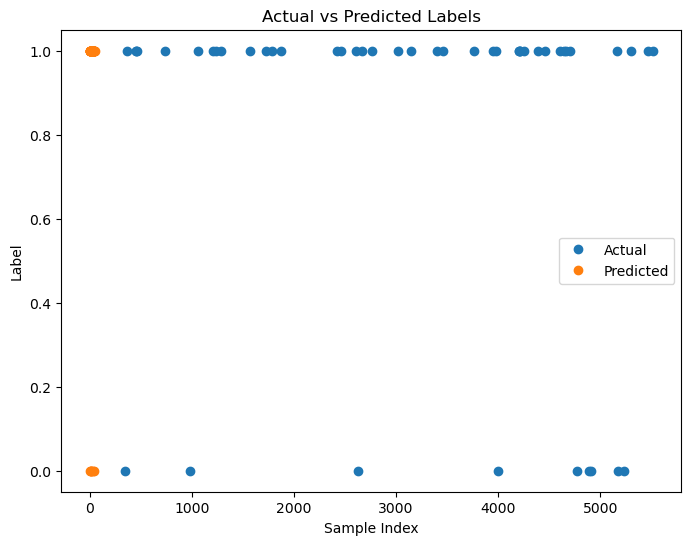

In [26]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    regression_model = LogisticRegression()
    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    # Prediction on training data
    prediction_on_training_data = regression_model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

    return accuracy_on_test_data, accuracy_on_training_data, Y_test, prediction_on_test_data

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("800x600")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

        self.show_graph_button = tk.Button(master, text="Show Graph", command=self.show_graph, bg="#ff9800", fg="white", font=self.font_style)
        self.show_graph_button.pack()

        self.show_confusion_matrix_button = tk.Button(master, text="Confusion Matrix", command=self.show_confusion_matrix, bg="#673ab7", fg="white", font=self.font_style)
        self.show_confusion_matrix_button.pack()

        self.show_error_button = tk.Button(master, text="Show Error", command=self.show_error, bg="#e91e63", fg="white", font=self.font_style)
        self.show_error_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data, _, _ = run_email_spam_detection(self.data_path)
            result_text = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=result_text, fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data, _, _ = run_email_spam_detection(self.data_path)
            comparison_result = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=comparison_result, fg="#ff5722")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_graph(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data = run_email_spam_detection(self.data_path)
            plt.figure(figsize=(8, 6))
            plt.plot(Y_test[:50], 'o', label='Actual')
            plt.plot(prediction_on_test_data[:50], 'o', label='Predicted')
            plt.title('Actual vs Predicted Labels')
            plt.xlabel('Sample Index')
            plt.ylabel('Label')
            plt.legend()
            plt.show()
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_confusion_matrix(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data = run_email_spam_detection(self.data_path)
            conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
            self.result_label.config(text=f"Confusion Matrix:\n{conf_matrix}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_error(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data = run_email_spam_detection(self.data_path)
            error_count = sum(Y_test != prediction_on_test_data)
            error_percentage = (error_count / len(Y_test)) * 100
            self.result_label.config(text=f"Error Count: {error_count}\nError Percentage: {error_percentage:.2f}%", fg="#ff5722")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


In [28]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    regression_model = LogisticRegression()
    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    # Prediction on training data
    prediction_on_training_data = regression_model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

    return accuracy_on_test_data, accuracy_on_training_data, Y_test, prediction_on_test_data, X_train, Y_train

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")

        # Set the initial directory to the current working directory
        self.initial_dir = os.getcwd()

        # Set background color and font
        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        # Set window size
        self.master.geometry("800x600")  # Adjust the size as needed

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

        self.show_graph_button = tk.Button(master, text="Show Graph", command=self.show_graph, bg="#ff9800", fg="white", font=self.font_style)
        self.show_graph_button.pack()

        self.show_confusion_matrix_button = tk.Button(master, text="Confusion Matrix", command=self.show_confusion_matrix, bg="#673ab7", fg="white", font=self.font_style)
        self.show_confusion_matrix_button.pack()

        self.show_error_button = tk.Button(master, text="Show Error", command=self.show_error, bg="#e91e63", fg="white", font=self.font_style)
        self.show_error_button.pack()

        self.show_data_sets_button = tk.Button(master, text="Show Total Data Sets", command=self.show_data_sets, bg="#795548", fg="white", font=self.font_style)
        self.show_data_sets_button.pack()

        self.show_classification_report_button = tk.Button(master, text="Show Classification Report", command=self.show_classification_report, bg="#607d8b", fg="white", font=self.font_style)
        self.show_classification_report_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data, _, _, _, _ = run_email_spam_detection(self.data_path)
            result_text = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=result_text, fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data, _, _, _, _ = run_email_spam_detection(self.data_path)
            comparison_result = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=comparison_result, fg="#ff5722")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_graph(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            plt.figure(figsize=(8, 6))
            plt.plot(Y_test[:50], 'o', label='Actual')
            plt.plot(prediction_on_test_data[:50], 'o', label='Predicted')
            plt.title('Actual vs Predicted Labels')
            plt.xlabel('Sample Index')
            plt.ylabel('Label')
            plt.legend()
            plt.show()
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_confusion_matrix(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
            self.result_label.config(text=f"Confusion Matrix:\n{conf_matrix}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_error(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            error_count = sum(Y_test != prediction_on_test_data)
            error_percentage = (error_count / len(Y_test)) * 100
            self.result_label.config(text=f"Error Count: {error_count}\nError Percentage: {error_percentage:.2f}%", fg="#ff5722")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_data_sets(self):
        if hasattr(self, 'data_path'):
            _, _, _, _, X_train, _ = run_email_spam_detection(self.data_path)
            total_data_sets = X_train.shape[0]
            self.result_label.config(text=f"Total Data Sets: {total_data_sets}", fg="#795548")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_classification_report(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            class_report = classification_report(Y_test, prediction_on_test_data)
            self.result_label.config(text=f"Classification Report:\n{class_report}", fg="#607d8b")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")
            import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    regression_model = LogisticRegression()
    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    # Prediction on training data
    prediction_on_training_data = regression_model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

    return accuracy_on_test_data, accuracy_on_training_data, Y_test, prediction_on_test_data, X_train, Y_train

class EmailSpamDetectionApp:
    def __init__(self, master):
        # Existing code...

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

        # Existing code...

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            accuracy_on_test_data, accuracy_on_training_data, _, _, _, _ = run_email_spam_detection(self.data_path)
            
            # Plotting Accuracy Comparison
            plt.figure(figsize=(8, 6))
            labels = ['Testing Accuracy', 'Training Accuracy']
            accuracies = [accuracy_on_test_data, accuracy_on_training_data]
            plt.bar(labels, accuracies, color=['#FF5722', '#2196F3'])
            plt.title('Accuracy Comparison')
            plt.ylabel('Accuracy')
            plt.show()
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

# Rest of the code remains the same...



if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()


AttributeError: 'EmailSpamDetectionApp' object has no attribute 'font_style'

C:\Users\hp38d\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


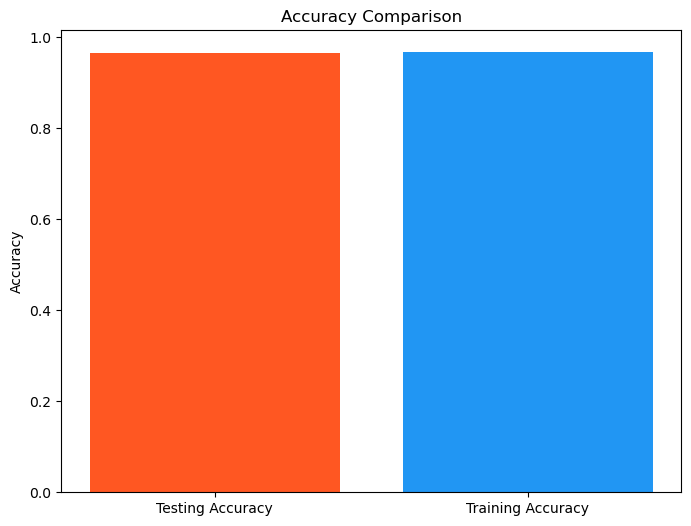

In [ ]:
import os
import tkinter as tk
from tkinter import filedialog
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

def run_email_spam_detection(data_path):
    # Your existing email spam detection code
    raw_mail_data = pd.read_csv(data_path)
    
    # Data Pre-processing
    mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
    mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})
    
    X = mail_data['Message']
    Y = mail_data['Category']

    # Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

    # Feature Extraction
    feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
    X_train_features = feature_extraction.fit_transform(X_train)
    X_test_features = feature_extraction.transform(X_test)

    # Train the model
    regression_model = LogisticRegression()
    regression_model.fit(X_train_features, Y_train)

    # Prediction on test data
    prediction_on_test_data = regression_model.predict(X_test_features)
    accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

    # Prediction on training data
    prediction_on_training_data = regression_model.predict(X_train_features)
    accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

    return accuracy_on_test_data, accuracy_on_training_data, Y_test, prediction_on_test_data, X_train, Y_train

class EmailSpamDetectionApp:
    def __init__(self, master):
        self.master = master
        self.master.title("Email Spam Detection App")
        self.initial_dir = os.getcwd()

        self.master.configure(bg="#f0f0f0")
        self.font_style = ("Helvetica", 12)

        self.master.geometry("800x600")

        self.data_path_label = tk.Label(master, text="Select CSV file:", bg="#f0f0f0", font=self.font_style)
        self.data_path_label.pack()

        self.browse_button = tk.Button(master, text="Browse", command=self.browse_file, bg="#4caf50", fg="white", font=self.font_style)
        self.browse_button.pack()

        self.run_button = tk.Button(master, text="Run Email Spam Detection", command=self.run_detection, bg="#2196f3", fg="white", font=self.font_style)
        self.run_button.pack()

        self.accuracy_comparison_button = tk.Button(master, text="Accuracy Comparison", command=self.accuracy_comparison, bg="#ff5722", fg="white", font=self.font_style)
        self.accuracy_comparison_button.pack()

        self.show_graph_button = tk.Button(master, text="Show Graph", command=self.show_graph, bg="#ff9800", fg="white", font=self.font_style)
        self.show_graph_button.pack()

        self.show_confusion_matrix_button = tk.Button(master, text="Confusion Matrix", command=self.show_confusion_matrix, bg="#673ab7", fg="white", font=self.font_style)
        self.show_confusion_matrix_button.pack()

        self.show_error_button = tk.Button(master, text="Show Error", command=self.show_error, bg="#e91e63", fg="white", font=self.font_style)
        self.show_error_button.pack()

        self.show_data_sets_button = tk.Button(master, text="Show Total Data Sets", command=self.show_data_sets, bg="#795548", fg="white", font=self.font_style)
        self.show_data_sets_button.pack()

        self.show_classification_report_button = tk.Button(master, text="Show Classification Report", command=self.show_classification_report, bg="#607d8b", fg="white", font=self.font_style)
        self.show_classification_report_button.pack()

        self.result_label = tk.Label(master, text="", bg="#f0f0f0", font=self.font_style)
        self.result_label.pack()

    def browse_file(self):
        file_path = filedialog.askopenfilename(initialdir=self.initial_dir, filetypes=[("CSV files", "*.csv")])
        self.data_path_label.config(text=f"Selected file: {file_path}")
        self.data_path = file_path

    def run_detection(self):
        if hasattr(self, 'data_path'):
            accuracy_on_test_data, accuracy_on_training_data, _, _, _, _ = run_email_spam_detection(self.data_path)
            result_text = f"Accuracy on Test Data: {accuracy_on_test_data:.2%}\nAccuracy on Training Data: {accuracy_on_training_data:.2%}"
            self.result_label.config(text=result_text, fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def accuracy_comparison(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            accuracy_on_test_data, accuracy_on_training_data, _, _, _, _ = run_email_spam_detection(self.data_path)
            
            # Plotting Accuracy Comparison
            plt.figure(figsize=(8, 6))
            labels = ['Testing Accuracy', 'Training Accuracy']
            accuracies = [accuracy_on_test_data, accuracy_on_training_data]
            plt.bar(labels, accuracies, color=['#FF5722', '#2196F3'])
            plt.title('Accuracy Comparison')
            plt.ylabel('Accuracy')
            plt.show()
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_graph(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            plt.figure(figsize=(8, 6))
            plt.plot(Y_test[:50], 'o', label='Actual')
            plt.plot(prediction_on_test_data[:50], 'o', label='Predicted')
            plt.title('Actual vs Predicted Labels')
            plt.xlabel('Sample Index')
            plt.ylabel('Label')
            plt.legend()
            plt.show()
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_confusion_matrix(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)
            self.result_label.config(text=f"Confusion Matrix:\n{conf_matrix}", fg="#009688")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_error(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            error_count = sum(Y_test != prediction_on_test_data)
            error_percentage = (error_count / len(Y_test)) * 100
            self.result_label.config(text=f"Error Count: {error_count}\nError Percentage: {error_percentage:.2f}%", fg="#ff5722")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_data_sets(self):
        if hasattr(self, 'data_path'):
            _, _, _, _, X_train, _ = run_email_spam_detection(self.data_path)
            total_data_sets = X_train.shape[0]
            self.result_label.config(text=f"Total Data Sets: {total_data_sets}", fg="#795548")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

    def show_classification_report(self):
        if hasattr(self, 'data_path'):
            _, _, Y_test, prediction_on_test_data, X_train, Y_train = run_email_spam_detection(self.data_path)
            class_report = classification_report(Y_test, prediction_on_test_data)
            self.result_label.config(text=f"Classification Report:\n{class_report}", fg="#607d8b")
        else:
            self.result_label.config(text="Please select a CSV file first.", fg="#e91e63")

if __name__ == "__main__":
    root = tk.Tk()
    app = EmailSpamDetectionApp(root)
    root.mainloop()
